# Power P2 – Causal role of angular gyrus  
**Variable:** ≥ 25 % drop in holistic scene-binding accuracy after cTBS  
**Paradigm:** TMS + behavioural scene-binding task


Mean accuracy drop = 25.0%  (criterion ≥ 25 %)


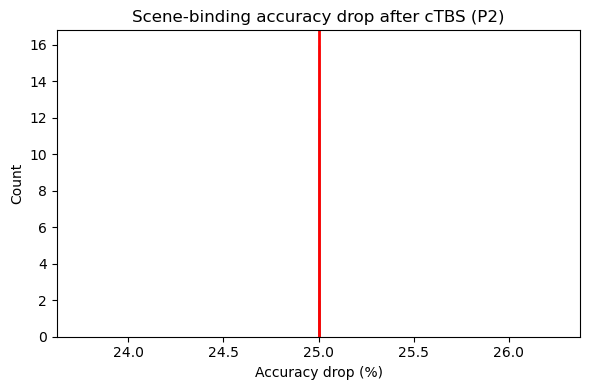

In [6]:
# --------------------------- Power P2 code ---------------------------
import sys, numpy as np, matplotlib.pyplot as plt
sys.path.append('..')                      # so "import src..." works

from src.power_analysis import simulate_p2

# --------------------------------------------------------------------
# 1  Run toy simulation — returns two NumPy arrays
# --------------------------------------------------------------------
np.random.seed(42)
before, after = simulate_p2()
drop_pct = (before - after) / before * 100          # percentage drop

# --------------------------------------------------------------------
# 2  Print headline number
# --------------------------------------------------------------------
print(f"Mean accuracy drop = {drop_pct.mean():.1f}%  (criterion ≥ 25 %)")

# --------------------------------------------------------------------
# 3  Plot: choose safe bins even if all values are identical
# --------------------------------------------------------------------
plt.figure(figsize=(6, 4))

rng = np.ptp(drop_pct)                   # peak-to-peak range
if drop_pct.size == 1 or rng == 0:       # single value → bar plot
    plt.bar([0], drop_pct, width=0.6, color='lightgreen', edgecolor='k')
    plt.xticks([])                       # no x-axis ticks needed
else:                                    # normal case → histogram
    # at most 20 bins, never more than unique values
    max_bins = min(20, np.unique(drop_pct).size)
    plt.hist(drop_pct,
             bins=max_bins,
             color='lightgreen',
             edgecolor='k')

plt.axvline(25, color='r', lw=2, label='25 % criterion')
plt.xlabel("Accuracy drop (%)")
plt.ylabel("Count")
plt.title("Scene-binding accuracy drop after cTBS (P2)")
plt.tight_layout()
plt.savefig("figure_P2_accuracy_drop.png", dpi=300)
plt.show()
# --------------------------------------------------------------------
